In [13]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap, ScalarMappable
import matplotlib as mpl
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
# rc('text.latex', preamble=r'''\\\\usepackage{amsmath}
#           \\\\usepackage{physics}
#           \\\\usepackage{siunitx}
#           ''')

In [14]:
def lam(x, Gamma):
    return(x * np.sqrt((x * Gamma + 1)/(x-1)))

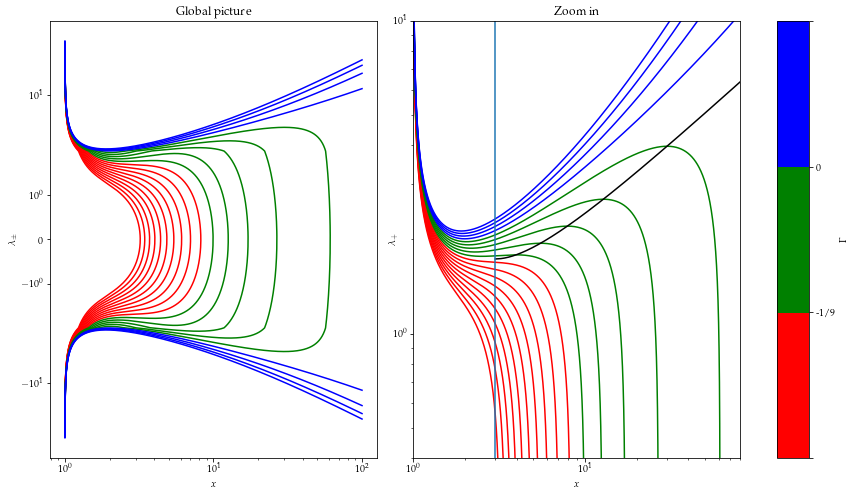

In [15]:
x = np.logspace(0, 2, num=10000)
Gammas = - 1/9 + np.linspace(-.2, .2, num=20)

# cmap = get_cmap('cool') 
# norm = mpl.colors.TwoSlopeNorm(vcenter=0, vmin=min(Gammas), vmax=max(Gammas))
cmap, norm = mpl.colors.from_levels_and_colors([min(Gammas), -1/9, 0, max(Gammas)], colors=['red', 'green', 'blue'], extend='neither')

colors = ScalarMappable(norm=norm, cmap=cmap).to_rgba

fig = plt.figure(figsize=(12, 7))
# fig.suptitle('Inversion points')
gs = mpl.gridspec.GridSpec(1, 3, figure=fig, width_ratios=[10, 10, 1], )
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])
ax2 = plt.subplot(gs[2])

for G in Gammas:
    lambda_of_x = lam(x, Gamma=G)
    notnan = ~np.isnan(lambda_of_x)
    if G < 0:
        ax0.plot(np.append(x[notnan], x[notnan][::-1]), np.append(lambda_of_x[notnan], -lambda_of_x[notnan][::-1]), c=colors(G))
    else:
        ax0.plot(x, lambda_of_x, c=colors(G))
        ax0.plot(x, -lambda_of_x, c=colors(G))

    ax1.plot(x, lambda_of_x, c=colors(G))

fine_G = np.linspace(-1/9, 0, num=200)
xtil = ((3*fine_G-1) - np.sqrt((1-3*fine_G)**2 + 16 * fine_G) ) / (4 * fine_G)
ax1.plot(xtil, [lam(x, G) for x, G in zip(xtil, fine_G)], c='black')
    # print(xtil, lam(xtil, Gamma=G))

ax0.set_yscale('symlog', linthreshy=2)
ax0.set_xscale('log')
ax0.set_title('Global picture')
ax0.set_xlabel('$x$')
ax0.set_ylabel('$\\lambda_{\\pm}$')

ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_ylim(4e-1, 1e1)
ax1.set_xlim(1e0, 80)
ax1.set_xlabel('$x$')
ax1.set_ylabel('$\\lambda_{+}$', labelpad=-5)
ax1.set_title('Zoom in')

colorbar = mpl.colorbar.ColorbarBase(ax=ax2, cmap=cmap, norm=norm, label='$\\Gamma$')
ax2.set_yticklabels([None, '-1/9', 0, None])

ax1.axvline(3)
plt.tight_layout()

plt.savefig('schwarzschild_orbit_inversions.pdf')